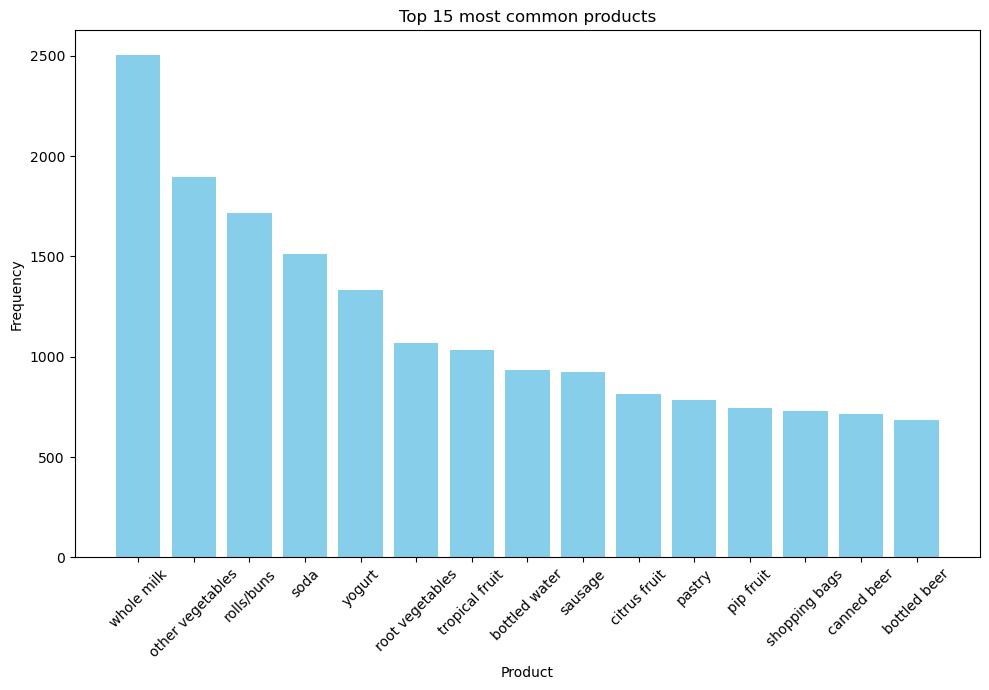

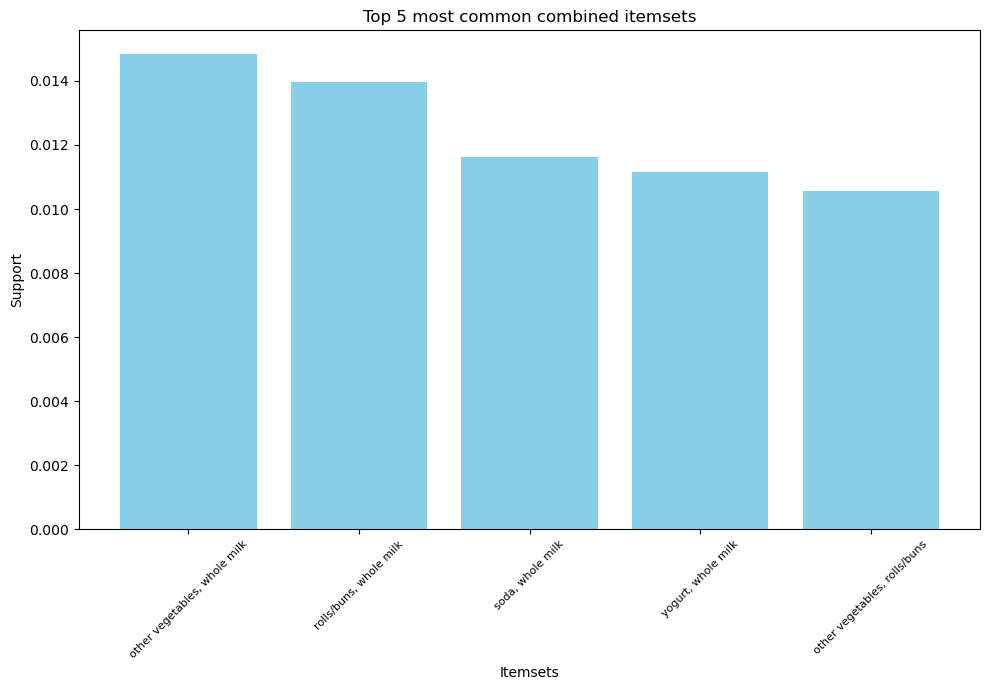

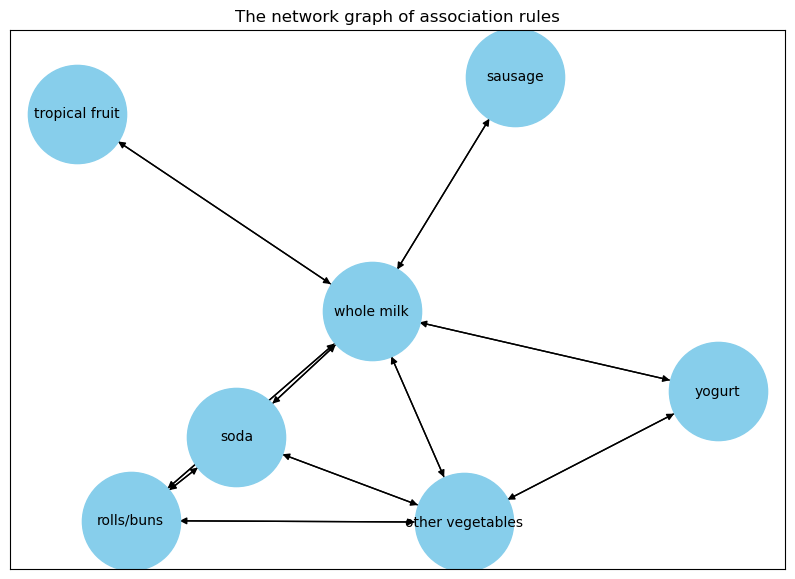

In [17]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv("Groceries_dataset.csv")
df.dropna(subset=['itemDescription'], inplace=True)

items_counts = df['itemDescription'].value_counts()
items_counts = items_counts.reset_index()
items_counts = items_counts.head(15)

plt.figure(figsize=(10,7))
plt.bar(items_counts['itemDescription'], items_counts['count'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Top 15 most common products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###
df['transaction_id'] = df['Member_number'].astype(str)+'_'+df['Date'].astype(str)
counts_matrix = pd.crosstab(df['transaction_id'], df['itemDescription'])

binary_matrix = counts_matrix.applymap(lambda x: 1 if x > 0 else 0).astype(bool)
frequent_itemsets = apriori(binary_matrix, min_support=0.001, use_colnames=True)
filtered_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x)) >= 2]

top_itemsets = filtered_itemsets.sort_values("support", ascending=False).head(5)
itemsets = top_itemsets['itemsets'].apply(lambda x: ', '.join(x))
support = top_itemsets['support']

plt.figure(figsize=(10,7))
plt.bar(itemsets, support, color='skyblue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 5 most common combined itemsets')
plt.xticks(rotation=45, fontsize=8) 
plt.tight_layout()
plt.show()

###
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
top_rules = rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(20)
G = nx.DiGraph()
for index, row in top_rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['confidence'])
    
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=10, edge_color='black', linewidths=1, arrows=True)
plt.title('The network graph of association rules')
plt.show()